<a href="https://colab.research.google.com/github/ignacioreyna/python-scripts/blob/master/WTI%20vs%20Soy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
brent = pd.read_excel('PrecioBrent.xls', skiprows=10)
brent['precio_brent'] = brent['DCOILBRENTEU']
brent = brent.drop('DCOILBRENTEU', axis=1)

In [0]:
wti = pd.read_excel('PrecioWTI.xls', skiprows=10)
wti['precio_wti'] = wti['DCOILWTICO']
wti = wti.drop('DCOILWTICO', axis=1)

In [0]:
promedio = wti.merge(brent, on='observation_date')

In [0]:
promedio['precio_brent'] = promedio['precio_brent'].replace(0, np.NaN)
promedio['precio_wti'] = promedio['precio_wti'].replace(0, np.NaN)
promedio['precio_promedio'] = promedio[['precio_wti','precio_brent']].mean(axis=1)
promedio = promedio.dropna()
promedio = promedio.drop(['precio_brent', 'precio_wti'], axis=1)

In [0]:
soja = pd.read_excel('Prueba.xls', skiprows=4, usecols=[0,1])

In [0]:
soja['Precio'] = soja['Precio'].replace('S/C', np.NaN)
soja = soja.dropna()

In [0]:
final = promedio.merge(soja, right_on="Fecha de operación", left_on='observation_date', how='outer')

In [0]:
final['Fecha de operación'] = final['Fecha de operación'].fillna(final['observation_date'])
final['observation_date'] = final['observation_date'].fillna(final['Fecha de operación'])
final = final.sort_values(by=['observation_date'])

In [0]:
final_soja = final[['observation_date', 'Precio']]
final_petroleo = final[['observation_date', 'precio_promedio']]

In [0]:
#df.plot(linewidth=linewidth, x=x, y=y, title=title, legend=legend, color=color, grid=grid,  xticks=([df['Fecha'].min(), df['Fecha'].max()]), xlim=((df['Fecha'].min()-pd.DateOffset(days=2)), (df['Fecha'].max()+pd.DateOffset(days=2)))).xaxis.set_major_locator(days)

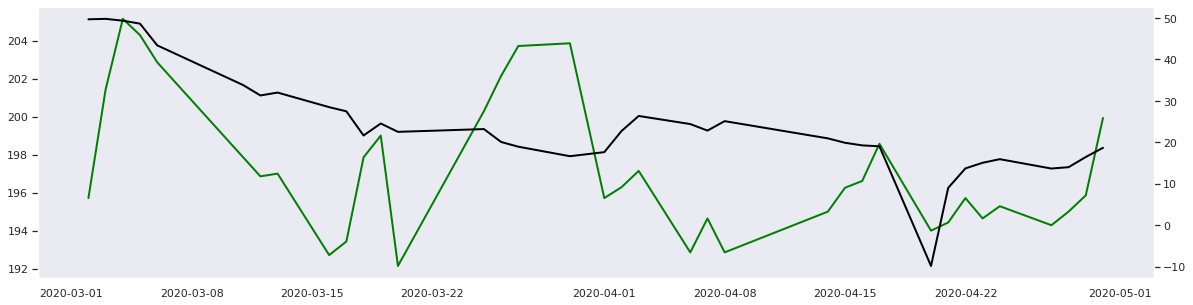

In [126]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final.dropna().observation_date, final.dropna().Precio/70, color='green', linewidth=2)
# set x-axis label

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final.dropna().observation_date, final.dropna().precio_promedio, color='black', linewidth=2)
ax.grid(False)
ax2.grid(False)
plt.show()